<a href="https://colab.research.google.com/github/gfigliuolo97/Progetto-ICon/blob/main/classificatore_vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install numpy

In [5]:
pip install pandas

In [6]:
pip install seaborn

In [7]:
pip install matplotlib

In [8]:
pip install sklearn

# Importiamo le librerie utili al progetto

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

## Caricamento del dataset

In [4]:
wine_dataset = pd.read_csv('winequality-red.csv')
group_names = ['bad','good']

###Shows the plot

In [25]:
def plot_results(classifier,X_test,y_test, name):
    
    pred = classifier.predict(X_test)
    print(classification_report(y_test, pred)) 
    confusion_mat = confusion_matrix(y_test, pred, group_names)
    ax = plt.subplot()
    sns.heatmap(confusion_mat, annot=True, ax = ax, fmt='g', cmap="Reds"); 

    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(name); 
    ax.xaxis.set_ticklabels(group_names);
    ax.yaxis.set_ticklabels(group_names);
    plt.show()

In [6]:
# Boxplot used for visualization of correlation 
def plot(x_value, y_value):
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.boxplot(x= x_value, y= y_value, data=wine_dataset,  palette='RdBu_r')


### Split dataset in two bins

In [7]:
# Splittig data in two bins 
# Marked as 'bad' ==> 1, 2, 3 ,4 , 5, 
# Marked as '' ==> 6, 7, 8, 9, 10
def split_data(): 
    bins = (2, 5.5, 8)
    wine_dataset['quality'] = pd.cut(wine_dataset['quality'], bins = bins, labels = group_names)
    return wine_dataset


Conteggio delle entry divise per qualità

In [8]:
wine_dataset = pd.read_csv("winequality-red.csv")
print(wine_dataset['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Stampa di entry presenti nel dataset

In [9]:
# Dataset visualization  
print('Rows in the dataset: ', wine_dataset.shape[0])

Rows in the dataset:  1599


Stampa del numero di colonne nel dataset

In [10]:
print('Columns in the dataset: ', wine_dataset.shape[1])

Columns in the dataset:  12


In [11]:
print(wine_dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
wine_dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Visualizzazione del conteggio delle entry divise per categoria

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


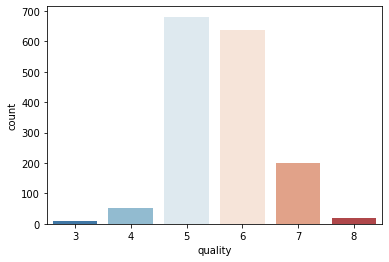

In [14]:
sns.countplot(wine_dataset['quality'], palette='RdBu_r')

## Data Correlation

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


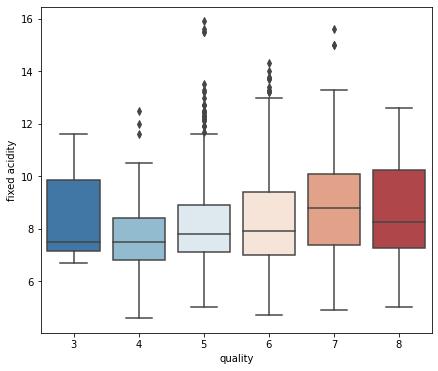

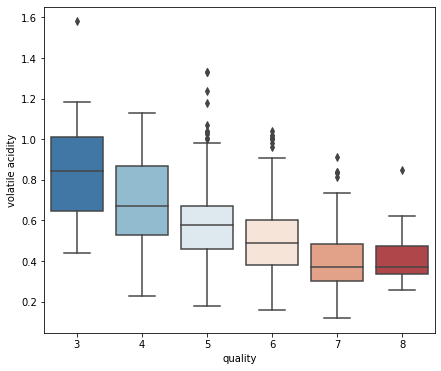

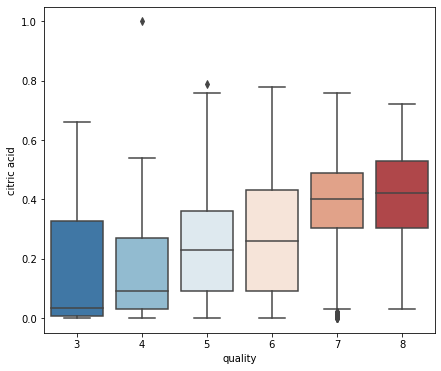

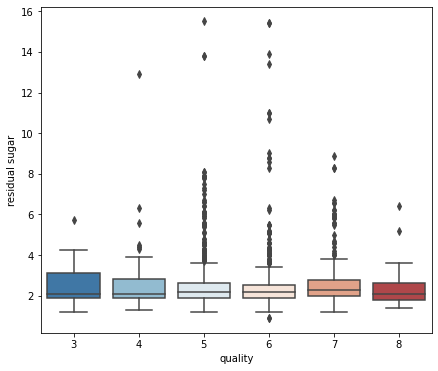

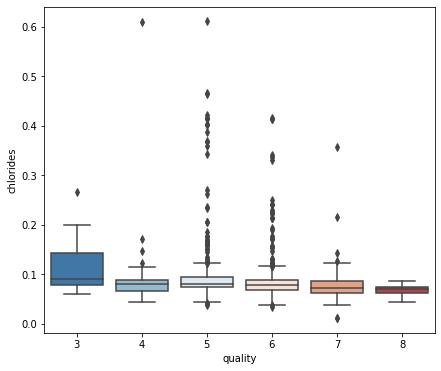

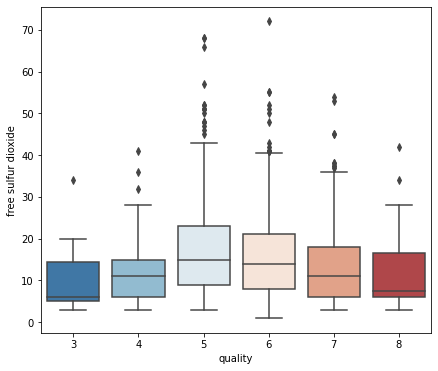

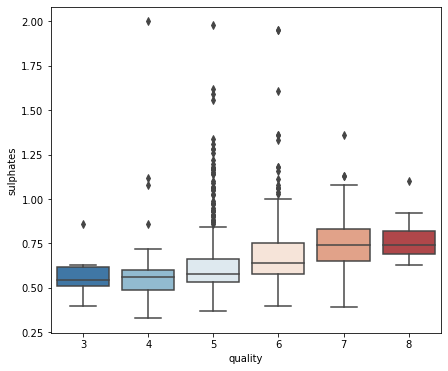

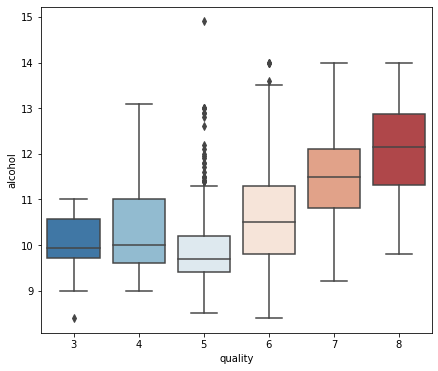

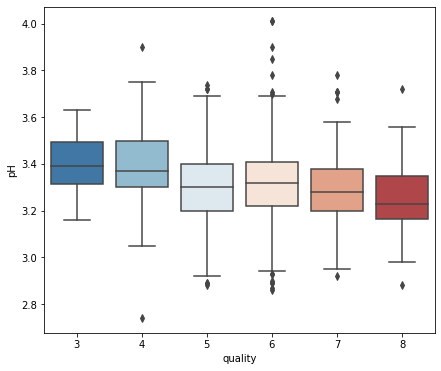

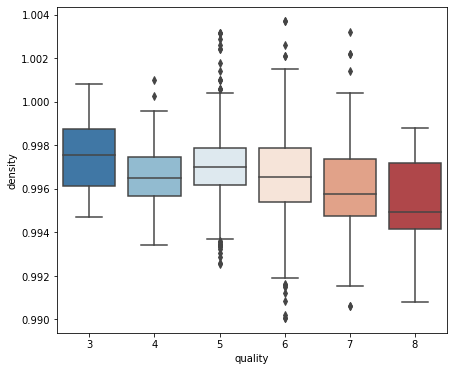

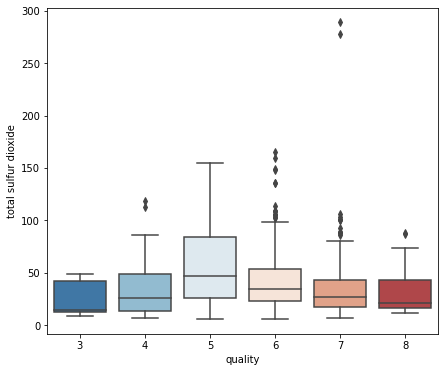

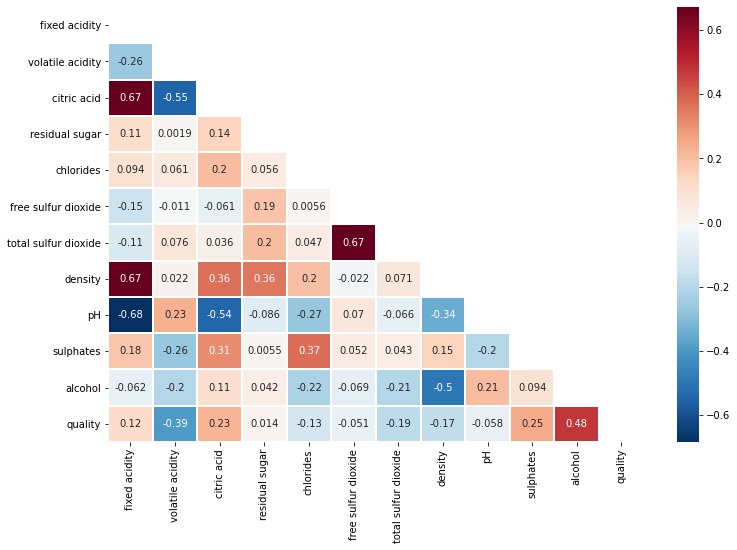

In [15]:
plot('quality', 'fixed acidity')
plot('quality', 'volatile acidity')
plot('quality', 'citric acid')
plot('quality', 'residual sugar')
plot('quality', 'chlorides')
plot('quality', 'free sulfur dioxide')
plot('quality', 'sulphates')
plot('quality', 'alcohol')
plot('quality', 'pH')
plot('quality', 'density')
plot('quality', 'total sulfur dioxide')
correlations = wine_dataset.corr()['quality'].drop('quality')
print(correlations)
plt.figure(figsize=(12,8))
corr = wine_dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask, annot=True, linewidths=1, cmap='RdBu_r')
plt.show()

## Fase di pre-processing

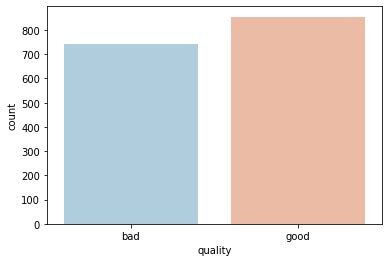

In [16]:
split_data()
sns.countplot(x='quality', data=wine_dataset, palette='RdBu_r')
plt.show()

In [18]:
#Subset x with every feature except 'quality' and subset y with feature quality
X = wine_dataset.iloc[:,:11]
y = wine_dataset['quality']


## Normalizzazione

In [19]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Principal Component Analysis


In [20]:
pca = PCA()
X_pca = pca.fit_transform(X)

#Calculate Variance Ratios
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(variance, decimals=3)*100)
print(var)

[28.2 45.7 59.8 70.8 79.5 85.5 90.8 94.6 97.7 99.3 99.8]


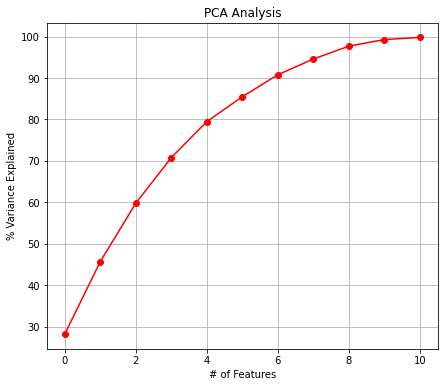

In [21]:
plt.figure(figsize=(7,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var, 'ro-')
plt.grid()

8 Principal Components for 90% of variation. Pick the first 8 components to predict

In [22]:
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)
print(wine_dataset['quality'].value_counts())

good    855
bad     744
Name: quality, dtype: int64


Splitting Data

In [23]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.25, random_state=0)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train:  (1199, 8)
Shape of X_test:  (400, 8)
Shape of y_train:  (1199,)
Shape of y_test (400,)


# Classification

## Support Vector Machines

Setting Parameter Range

best_params {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best_estimator SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

         bad       0.72      0.71      0.71       185
        good       0.75      0.76      0.76       215

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



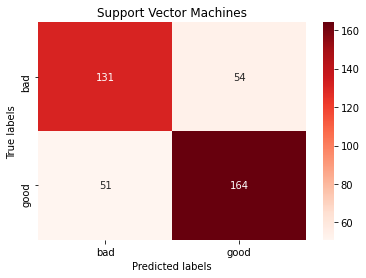

In [26]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'sigmoid']}

grid_svm = GridSearchCV(SVC(), param_grid=param_grid, cv=5, refit = True, verbose = False) 
grid_svm.fit(X_train, y_train) 
print("best_params", grid_svm.best_params_) 
print("best_estimator", grid_svm.best_estimator_) 
plot_results(grid_svm, X_test, y_test,'Support Vector Machines')

## Random Forest

best_params {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 500}
best_estimator RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
              precision    recall  f1-score   support

         bad       0.80      0.71      0.75       185
        good       0.77      0.84      0.81       215

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



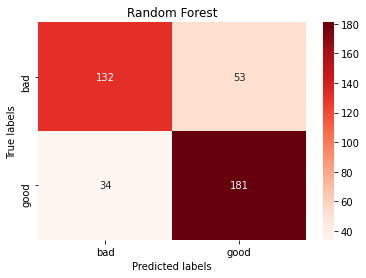

In [39]:
rf=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 250, 500],
    'max_features': ['auto', 'log2'],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, refit = True, verbose = False)
grid_rf.fit(X_train, y_train)

print("best_params", grid_rf.best_params_) 
print("best_estimator", grid_rf.best_estimator_) 
plot_results(grid_rf, X_test, y_test,'Random Forest')

## K-Nearest Neighbor

best_params {'leaf_size': 1, 'n_neighbors': 1}
best_estimator KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

         bad       0.73      0.68      0.70       185
        good       0.74      0.79      0.76       215

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



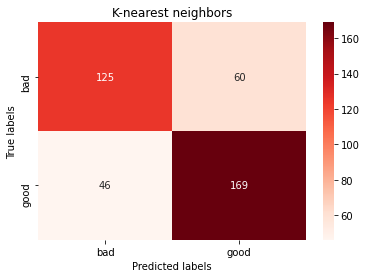

In [40]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1,4,5,6,7,8],
              'leaf_size':[1,3,5,10],
}

grid_knn = GridSearchCV(knn, param_grid=param_grid)
grid_knn.fit(X_train ,y_train)

print("best_params", grid_knn.best_params_) 
print("best_estimator", grid_knn.best_estimator_) 
plot_results(grid_knn, X_test, y_test,'K-nearest neighbors')

## AdaBoost

              precision    recall  f1-score   support

         bad       0.72      0.63      0.67       185
        good       0.71      0.80      0.75       215

    accuracy                           0.72       400
   macro avg       0.72      0.71      0.71       400
weighted avg       0.72      0.72      0.72       400



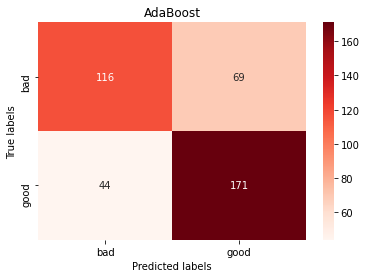

In [41]:
Ada = AdaBoostClassifier(random_state=1)
Ada.fit(X_train, y_train)
plot_results(Ada, X_test, y_test,'AdaBoost')

## Gaussian Naive Bayes

              precision    recall  f1-score   support

         bad       0.77      0.65      0.71       185
        good       0.74      0.83      0.78       215

    accuracy                           0.75       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.75      0.75       400



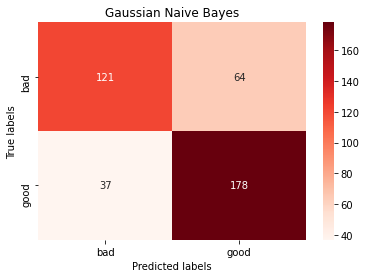

In [42]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
plot_results(gaussian, X_test, y_test,'Gaussian Naive Bayes')